## Market Segmentation

### Import the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()    # set style to seaborn

from sklearn.cluster import KMeans

### Load the Data

In [2]:
data = pd.read_csv('3.12. Example.csv')

In [3]:
data #print data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [4]:
# Satisfaction: self-reported on a scale of 1 through 10 with 10 being Extremely Satisfied
# Type of Data: DISCRETE
# Range: 1 to 10

# Brand Loyalty: no widely accpeted technique to measure it but there are proxies like churn rate, retention rate, or customer lifetime value (CLV)
# Type of Data: CONTINUOUS
# Range: -2.5 to 2.5

### Plot the Data

Text(0, 0.5, 'Loyalty')

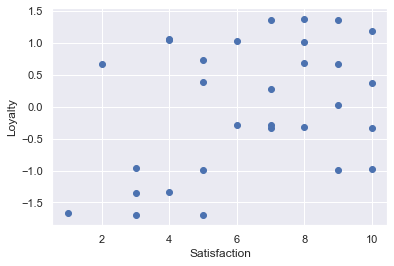

In [5]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Select the Features

In [6]:
# Can divide the plot into 4 equal squares:
# 1. Low Satisfaction, Low Loyalty
# 2. Low Satisfaction, High Loyalty
# 3. High Satisfaction, Low Loyalty
# 4. High Satisfaction, High Loyalty

In [7]:
x = data.copy()

### Clustering

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [9]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

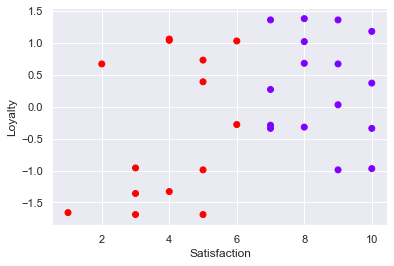

In [10]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [11]:
# most probably, the algorithm ONLY considered 'Satisfaction' as a feature
# this is due to not standardizing before clustering
# whenever we cluster on the basis of a single fature, the results looks like this graph; as if a vertical line was drawn to cluster


### Standardize the Variables

In [12]:
# to give the features equal weight, we must standardize the data before clustering

from sklearn import preprocessing
# 'sklearn.preprocessing.scale(x)' scales (standardizes with mean 0, and st. dev. of 1 by default) each variable (column) separately
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Take Advantage of the Elbow Method

In [13]:
# because we do not know the optimal number of clusters to use, we will invoke the Elbow Method to determine
wcss =[] #declare a list

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.558520827037861,
 4.829871971460005,
 3.797868137669906]

Text(0, 0.5, 'WCSS')

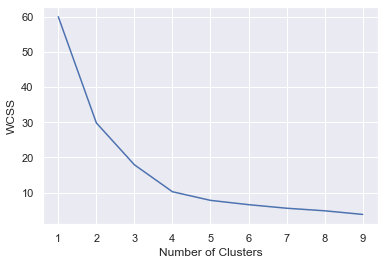

In [14]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [15]:
# from the plot, we can infer 4 different clusters to try (2,3,4,5)
# we still don't know which is the best on to use

### Explore Clustering Solutions and Select the Number of Clusters

In [16]:
kmeans_new = KMeans(4)  #let's try a cluster of '2' first
kmeans_new.fit(x_scaled) #fit the data
clusters_new = x.copy() #create a new dataframe
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled) #create new column with this new variable

In [17]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

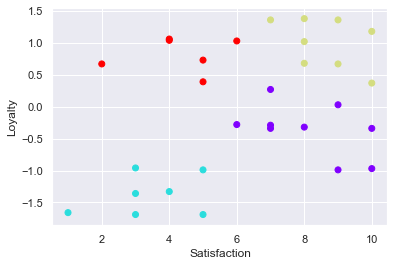

In [18]:
# we will plot the data without standardizing the axes, but the solution will be the standardized one

plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [20]:
# we often choose to plot using the original values for clearer interpretability
# NOTE: the discrepancy we observe here depends on the range of the axes too
# naming clusters is very important
# Lower Left = 'Alienated'
# Blue = 'Everything Else'

# trying all 4 cluster types, it seems that '4' is the most optimal of them all

In [21]:
# How is Clustering Helpful?

# Types of Analysis: 
#   1. Exploratory - get acquainted with data, search for patterns, plan
#                   (i.e. data visualization, descriptive, clustering)
#   2. Confirmatory - explain a phenomenon, confirm a hypothesis, validate previous research
#   3. Explanatory - explain a phenomenon, confirm a hypothesis, validate previous research
#                   (i.e. mostly commonly type of analysis for using clustering)

# Big Advantage: showing market changes

# Alienated -> Low Satisfaction, Low Loyalty
# Supporters -> Low Satisfaction, High Loyalty
# Fans -> High Satisfaction, High Loyalty
# Roamers -> High Satisfaction, Low Loyalty

# How to increase loyalty: sales, loyalty cards, raffles